In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
%matplotlib inline

In [2]:
print(os.listdir("../Datasets/"))

['.ipynb_checkpoints', 'datasets.zip', 'extralayers.ipynb', 'test', 'train', 'val']


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from sklearn.metrics import classification_report, confusion_matrix

In [4]:
datasets_dir=os.listdir("../Datasets/")

In [5]:
train_datasets="../Datasets/train"
test_datasets="../Datasets/test"
validation_datasets="../Datasets/val"

In [6]:
trainDatasets_normal="../Datasets/train/NORMAL"
train_datasets_pne="../Datasets/train/PNEUMONIA"
print(len(os.listdir(train_datasets_pne)))
print(len(os.listdir(trainDatasets_normal)))

3875
1342


In [7]:
random_value_normal=np.random.randint(0,len(os.listdir(trainDatasets_normal)))
random_value_pne=np.random.randint(0,len(os.listdir(train_datasets_pne)))
random_value_normal

697

In [8]:
print("NORMAL IMAGE")
random_normal_pic=os.listdir(trainDatasets_normal)[random_value_normal]
normal_image_datasets=random_normal_pic
print("Normal image",normal_image_datasets)

random_pne_pic=os.listdir(train_datasets_pne)[random_value_pne]
pne_image_datasets=random_pne_pic
print("Pneumonia image",random_pne_pic)
random_normalpic_load=Image.open(trainDatasets_normal+normal_image_datasets)
random_pne_pic_load=Image.open(train_datasets_pne+pne_image_datasets)

f=plt.figure(figsize=(10,8))
subplot=f.add_subplot(1,2,1)
img_load_plot=plt.imshow(random_normalpic_load)
subplot.set_title("NORMAL")

subplot=f.add_subplot(1,2,2)
img_load_plot=plt.imshow(random_pne_pic_load)
subplot.set_title("Pneumonia")

NORMAL IMAGE
Normal image NORMAL2-IM-0512-0001.jpeg
Pneumonia image person945_bacteria_2870.jpeg


FileNotFoundError: [Errno 2] No such file or directory: '../Datasets/train/NORMALNORMAL2-IM-0512-0001.jpeg'

In [ ]:
datasets=Image.open("../Datasets/train/NORMAL/IM-01155-0001.jpeg")
data=plt.imread("../Datasets/train/NORMAL/IM-01155-0001.jpeg")
data.shape

In [9]:
model_for_Chest=Sequential()
#1st layer
model_for_Chest.add(Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)))
model_for_Chest.add(MaxPooling2D(pool_size=(2,2)))

#2nd layer
model_for_Chest.add(Conv2D(64,(3,3), activation='relu'))
model_for_Chest.add(MaxPooling2D(pool_size=(2,2)))
#3rd layer
model_for_Chest.add(Conv2D(128,(3,3), activation='relu'))
model_for_Chest.add(MaxPooling2D(pool_size=(2,2)))

#4th layer
model_for_Chest.add(Conv2D(256,(3,3), activation='relu'))
model_for_Chest.add(MaxPooling2D(pool_size=(2,2)))
#bridge
model_for_Chest.add(Flatten())
model_for_Chest.add(Dense(activation='relu', units=128))
model_for_Chest.add(Dense(activation='sigmoid', units=1))

In [10]:
model_for_Chest.compile(optimizer="adam",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

In [11]:
number_test_sample=600
batch_size=32

In [12]:
train_datasets_generator=ImageDataGenerator(rescale=1./255,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)
test_datasets_generator=ImageDataGenerator(rescale=1./255)

In [13]:
train_dataset_manage=train_datasets_generator.flow_from_directory("../Datasets/train/",
                                                                  target_size=(64,64),
                                                                  batch_size=32,
                                                                  class_mode="binary")
test_dataset_manage=test_datasets_generator.flow_from_directory("../Datasets/test/",
                                                                  target_size=(64,64),
                                                                  batch_size=32,
                                                                  class_mode="binary")
validation_dataset_manage=test_datasets_generator.flow_from_directory("../Datasets/val/",
                                                                  target_size=(64,64),
                                                                  batch_size=32,
                                                                  class_mode="binary")

Found 5218 images belonging to 2 classes.
Found 628 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [14]:
model_for_Chest.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
model_for_Chest_info=model_for_Chest.fit_generator(train_dataset_manage,
                                                   steps_per_epoch=160,
                                                   epochs=10,
                                                   validation_data=validation_dataset_manage,
                                                   validation_steps=600)

Epoch 1/10
160/160 [==============================] - 66s 407ms/step - loss: 0.3970 - accuracy: 0.8240 - val_loss: 0.3880 - val_accuracy: 0.8125
Epoch 2/10
160/160 [==============================] - 65s 407ms/step - loss: 0.2348 - accuracy: 0.9039
Epoch 3/10
160/160 [==============================] - 66s 412ms/step - loss: 0.2284 - accuracy: 0.9063
Epoch 4/10
160/160 [==============================] - 67s 418ms/step - loss: 0.1873 - accuracy: 0.9291
Epoch 5/10
160/160 [==============================] - 66s 413ms/step - loss: 0.1789 - accuracy: 0.9269
Epoch 6/10
160/160 [==============================] - 65s 405ms/step - loss: 0.1660 - accuracy: 0.9350
Epoch 7/10
160/160 [==============================] - 66s 413ms/step - loss: 0.1519 - accuracy: 0.9399
Epoch 8/10
160/160 [==============================] - 66s 409ms/step - loss: 0.1611 - accuracy: 0.9367
Epoch 9/10
160/160 [==============================] - 67s 416ms/step - loss: 0.1348 - accuracy: 0.9487
Epoch 10/10
160/160 [==========

In [17]:
test_accuracy=model_for_Chest.evaluate_generator(test_dataset_manage, steps=600)
print("Accuracy : ",test_accuracy[1]*100, "%")

Accuracy :  88.37579488754272 %


In [18]:
y_predict=model_for_Chest.predict_generator(test_dataset_manage,100)
y_predicts=np.argmax(y_predict,axis=1)

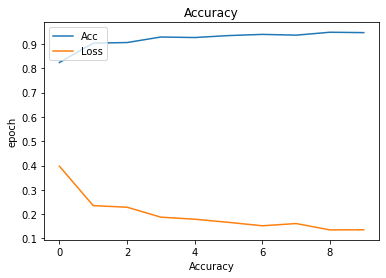

In [19]:
plt.plot(model_for_Chest_info.history['accuracy'])
plt.plot(model_for_Chest_info.history['loss'])
plt.title('Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('epoch')
plt.legend(["Acc","Loss"],loc="upper left")
plt.show()